### Group Members:

- Arjun Roy, 22-742-423
- Omkar Ingale, 24-716-466
- Mohammad Mahdi Hejazi, 24-748-998

# Assignment 5 - Time Series Processing

The goal of this assignment is to explore time series processing for **sleep stage classification**, using models that capture **temporal dynamics** in EEG recordings.
We will implement and compare different neural network architectures **— 1D Convolution, Recurrent Neural Network (RNN), Long Short-Term Memory (LSTM), and Attention-based network —** on a subset of the **Sleep-EDF dataset**.

The dataset contains EEG signals recorded from human subjects at the Fpz-Cz electrode location on the scalp.
The EEG signal is sampled at **100 Hz**, meaning **each second contains 100 data points**.
As is common practice in sleep research, the continuous signal is segmented into **non-overlapping 30-second windows**, resulting in **3000 sequential samples per segment**.
In other words, each segment represents **a single-channel time series** reflecting brain activity during that **30-second interval**.
Each EEG segment is labeled with one of the following five sleep stages: Wake, N1 (Light Sleep), N2 (Stable Sleep), N3 (Deep Sleep), or REM (Rapid Eye Movement), **corresponding to labels 0 through 4**.

Each individual's data is stored in a separate `.npz` file.
For this assignment, the dataset will be split by subject: a portion of individuals will be used for training, another subset for validation, and the remaining subjects for testing.

**1D convolution** is well-suited for time-series data like EEG signals, as it applies localized filters along the time axis to automatically capture temporal patterns such as trends, transitions, and periodicities, while preserving sequence order.
Stacking **Conv1d** and pooling layers helps compress the sequence length efficiently without losing important information, enabling faster and more scalable processing.
Therefore, in this assignment, to handle the long input sequences (**3000 time steps**), you are required to design **a small 1D convolutional neural network** as a feature extractor, which will also be utilized by all subsequent models, including the RNN, LSTM, and Attention-based network.
Each model will then process the reduced sequence to classify the sample into one of the sleep stages.

The entire assignment will be implemented using `PyTorch`.

**Structure of Networks**

1. **Feature Extractor**: *The designed feature extractor network based on Conv1d operations*

2. **Classifier Networks:**

   a) **Pooling**: *Feature extractor* ⟶  *Global pooling* ⟶ *Classifier*

   b) **RNN**: *Feature extractor* ⟶  *RNN* ⟶ *Classifier*

   c) **LSTM**: *Feature extractor* ⟶  *LSTM* ⟶ *Classifier*

   d) **Attention with class token**: *Feature extractor* ⟶  *Self-attention with Class token* ⟶ *Class token* ⟶ *Classifier*

**Class Imbalance**

After training all networks, we will evaluate and compare their performance.
The best-performing model will then be further refined to better address class imbalance by applying two strategies:

* **Global Class Weighting**: Apply a weighted loss function where each class is assigned a weight inversely proportional to its frequency in the entire training set.
This ensures that samples from underrepresented classes contribute more significantly to the loss.

* **DynaMit Approach**: Implement a dynamic class weighting method, where class weights are computed per batch during training based on the class distribution within each batch.
Unlike fixed global class weights, this approach adapts dynamically to the composition of each batch.

The final results from each model will be compared based on overall classification accuracy, balanced accuracy and per-class performance.

## Theoretical Sections

In this section, we address following fundamental aspects:  

1. Design the feature extractor network for time series processing
2. Compute the output feature map size of the designed feature extractor network
3. Discuss pros and cons of other feature extraction methods
4. Explore normalization methods for EEG time series signals
5. Discuss alternative attention methods for EEG classification
6. Handle variable-length sequences

#### Task 1.1: 1D Convolutional Network

Design a **feature extractor** that **must** include **three 1D convolutional layers** with $Q_1$, $Q_2$, and $Q_3$ output channels, respectively.
Explain the reasoning why you have designed the network in the way you did.

**Note:** You are encouraged to add additional layers such as `MaxPool1D`, `BatchNorm1D`, `non-linear activations` (e.g., ReLU, GELU, etc.) and `Dropout` wherever you find appropriate, in order to improve feature compression and model generalization.
Also, make use of padding, striding or any other techniques in your convolution and pooling operations.
A reasonable number of output channels could be $Q_3=128$.

Answer:

**Layer 1**:
...

**Layer 2**:
...

**Layer 3**:
...

#### Task 1.2: Calculate Feature Map Dimension

Given the network designed in Task 1.1, calculate the dimensionality of the extracted feature map, including the new sequence length, the number of channels and the batch size.

**Hint:** Consider how each `Conv1d` and `MaxPool1d` layer affects the time dimension.

Answer: ...

#### Task 1.3: Feature Extractors

When performing classification on brain waves, we can apply temporal models such as LSTM, GRU, or attention-based networks for time-series EEG signals.
However, high-frequency wave structures are difficult to learn from.
Therefore, in the literature there exist several ways of how to handle such high-frequency data.

**Which methods or architectures can be used for feature extraction?**
Please explain possible methods and their advantages/disadvantages.

Answer:
- Method 1: ...
  + Advantage: ...
  + Disadvantage: ...

- Method 2: ...
  + Advantage: ...
  + Disadvantage: ...

...

#### Task 1.4: Normalization Methods

Input normalization is an important preprocessing step that helps in providing inputs in reasonable input ranges.
Especially for such sequence-based systems, there exist several variations of input normalization.

**How could we normalize the time sequence brain signals (e.g., EEG) for sleep stage classification?**
Please explain possible methods.

Answer: ...

#### Task 1.5: Attention Mechanisms

In Task 2.7, we will make use of standard self-attention with a class token to extract sequence-level information to perform the final classification task.
This includes concatenating a learnable class token to the features extracted by the feature extractor, apply self-attention, and then evaluate the result of the transformed class token.
While this is the most commonly applied way of extracting sequence-level information in attention-based networks, other ways of extracting such sequence-level information also exist.

**Explain possible methods for using attention mechanisms -- not only self-attention -- to extract sequence-level information.**

Answer: ...

#### Task 1.6: Variable Sequence Lengths

In our small example above, we ensured that the dataset always contained the same sequence lengths for all samples.
However, in many tasks, including natural language processing, sequence lengths can differ between samples.

**Explain how we can handle situations where the input sequences have different lengths?**
Provide at least two different strategies.

Answer:
...

## Coding


**<font color='red' size='5'>This section has to be submitted by 11:59 p.m. on Wednesday, May 21, to be graded.</font>**

Before we start, we should assure that we have activated CUDA -- otherwise training might take long.
In Google Colaboratory:

1. Check the options Runtime -> Change Runtime Type on top of the page.
2. In the popup window, select hardware accelerator GPU.

Afterward, the following command should run successfully:

In [ ]:
import torch

if torch.cuda.is_available():
    print("Successfully enabled CUDA processing")
    device = torch.device("cuda")
else:
    print("CUDA processing not available. Things will be slow :-(")
    device = torch.device("cpu")

Successfully enabled CUDA processing


### Dataset

In this assignment, the dataset consists of EEG signals stored in `.npz` files.
Each file corresponds to one subject's data.
In particular, loading a subject's file provides two essential `numpy` arrays that we use.
These two arrays can be accessed using the keys `x` and `y` respectively in the loaded `.npz` file.

* `x` (Input): The EEG signals, where each sample is a 30-second window containing 3000 sequential points across a single channel. The inputs are $X^{[n]} \in \mathbb R^{3000\times1}$.
* `y` (Target): The corresponding sleep stage labels, where each label $\tau^{[n]} \in \{0, 1, 2, 3, 4\}$ represents one of the five sleep stages: Wake, N1, N2, N3, and REM.

Please use the cell below to download and extract the data into the specified `data_directory`.

In [ ]:
import pathlib
import urllib
import zipfile

# set directory where to download data to
data_directory = pathlib.Path("data")
data_file = data_directory/"Sleep-EDF-Subjects.zip"

data_url = "https://seafile.ifi.uzh.ch/f/08eda6b5e19a4b39b922/?dl=1"

# create data directory
data_directory.mkdir(exist_ok=True)

# Skip downloading if the file already exists
if not data_file.is_file():
    # Download the file
    urllib.request.urlretrieve(data_url, data_file)
    print(f"Downloaded {data_file} successfully.")

    # Extract the zip file
    with zipfile.ZipFile(data_file, 'r') as zip_ref:
        zip_ref.extractall(path=data_directory)
    print(f"Extracted {data_file} successfully.")

For this assignment, specific lists of subject files are provided below to define the training, validation, and test sets.
**Please run the following cell to define them, and make sure to use these splits to ensure consistency across all experiments.**

In [ ]:
# Define our training/validation/test splits, which we perform per subject
training_subjects = ["SC4001E0.npz", "SC4002E0.npz", "SC4011E0.npz", "SC4012E0.npz", "SC4021E0.npz", "SC4022E0.npz", "SC4031E0.npz", "SC4032E0.npz", "SC4041E0.npz", "SC4042E0.npz"]
validation_subjects = ["SC4051E0.npz", "SC4052E0.npz", "SC4061E0.npz"]
test_subjects = ["SC4062E0.npz", "SC4071E0.npz", "SC4072E0.npz"]

stage_names = {
    0: "Wake",
    1: "Light sleep",
    2: "Stable sleep",
    3: "Deep sleep",
    4: "REM"
}

O = len(stage_names)

#### Task 2.1: Dataset Loading

Implement a function that takes a list of subject file names and loads the corresponding data to create the full input $𝑋$ and target $\tau$ `torch.Tensor` for the specified set (training, validation, or test).
**The data from all subject files of a set should be concatenated.**

Ensure that:

* The input $X$ tensor is of type `torch.float32` and has the shape **(Number of samples, Channels, Sequence length)**. *This format is necessary because the feature extractor expects the input in this order.*
* The target $T$ tensor is of type `torch.long` and has the shape **(Number of samples,)**.

In [ ]:
import numpy

def load_data(subject_list):

    # Read all subject files of a set
    inputs, targets = [], []

    for subject in subject_list:
        data = numpy.load(data_directory/subject)

        x = data["x"]
        y = data["y"]

        # If shape is (N, 3000, 1), squeeze the last dimension
        if x.ndim == 3 and x.shape[-1] == 1:
            x = x.squeeze(-1)  # Shape : (N, 3000)

        input = torch.tensor(x, dtype=torch.float32).unsqueeze(1)  # EEG signals
        target = torch.tensor(y, dtype=torch.long)  # Labels

        inputs.append(input)
        targets.append(target)

    # convert lists to torch tensor format, using the correct data types and shapes
    # Concatenate all samples across subjects
    X = torch.cat(inputs, dim=0)  # Shape: (Total samples, Channels, Sequence length)
    T = torch.cat(targets, dim=0)  # Shape: (Total samples,)

    return X,T

# We load the three different sets
X_train, T_train = load_data(training_subjects)
X_valid, T_valid = load_data(validation_subjects)
X_test, T_test = load_data(test_subjects)

In [ ]:
#Print shapes of the datasets
print(f"Train X: {X_train.shape}, T: {T_train.shape}")
print(f"Valid X: {X_valid.shape}, T: {T_valid.shape}")
print(f"Test X: {X_test.shape}, T: {T_test.shape}")

Train X: torch.Size([10589, 1, 3000]), T: torch.Size([10589])
Valid X: torch.Size([2761, 1, 3000]), T: torch.Size([2761])
Test X: torch.Size([3265, 1, 3000]), T: torch.Size([3265])


#### Test 1: Data Types and Sizes

Verify that all tensors have the correct shape and data type.

In [ ]:
# Define datasets and expected shapes
sets = {
    "train": (X_train, T_train, 10589),
    "valid": (X_valid, T_valid, 2761),
    "test": (X_test, T_test, 3265)
}

for set, (X, T, expected_length) in sets.items():
    assert isinstance(X, torch.Tensor) and isinstance(T, torch.Tensor), f"{set}: X or T is not a torch.Tensor"
    assert X.dtype == torch.float32, f"X_{set} should be float32"
    assert T.dtype == torch.long, f"T_{set} should be long"
    assert X.shape == (expected_length, 1, 3000), f"X_{set} shape should be ({expected_length}, 1, 3000)"
    assert T.shape == (expected_length,), f"T_{set} shape should be ({expected_length},)"

print("Sanity check passed! All datasets are correctly loaded.")

Sanity check passed! All datasets are correctly loaded.


#### Task 2.2: Data Visualization

In this task, we will explore the dataset by creating two different visualizations to better understand its structure.

First, randomly select one EEG segment for each different sleep stage label (0 to 4) from **the training set** and plot them.
On the x-axis, display the corresponding sleep stage names (e.g., Wake, Light Sleep, etc.) centered under each segment.
The y-axis should represent the EEG signal amplitude.

As usual, try to avoid using `numpy` functionality and rely solely on `torch` and `matplotlib` functions.

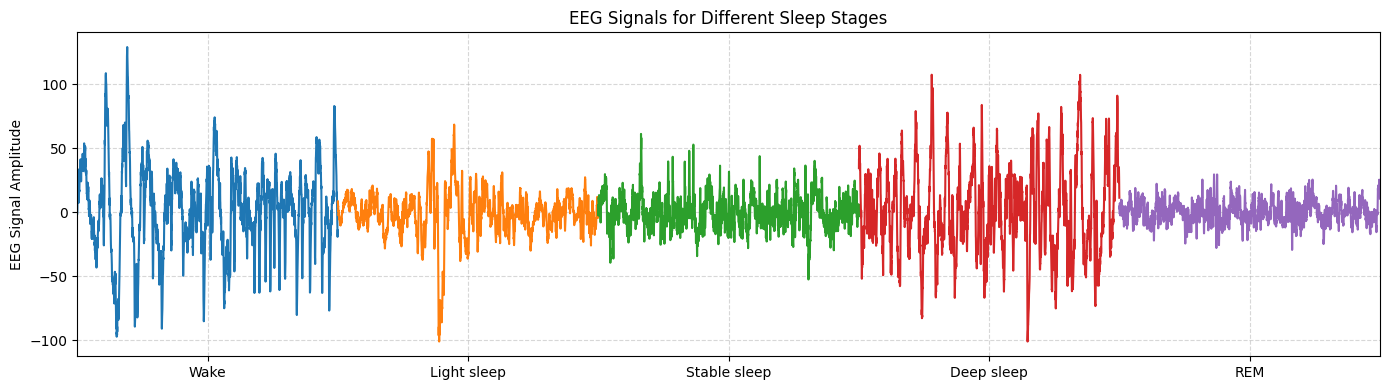

In [ ]:
from matplotlib import pyplot

torch.manual_seed(42)

# ------------------ EEG signal segments plot ------------------

# Colors for each sleep stage
stage_colors = {0: "#1f77b4", 1: "#ff7f0e", 2: "#2ca02c", 3: "#d62728", 4: "#9467bd"}

pyplot.figure(figsize=(14, 4))
start = 0
segment_length = 3000  # Each EEG segment has 3000 samples

for label in range(O):

    # Find all indices where the label matches the current sleep stage in the training set
    indices = torch.where(T_train==label)[0]
    # Randomly select one index from indices
    random_idx = indices[torch.randint(len(indices),(1,)).item()]
    # Select the EEG signals of that index
    eeg_signals = X_train[random_idx][0]

    # Plot the EEG signal with correct offset on the x-axis
    end = start + len(eeg_signals)
    pyplot.plot(range(start, end), eeg_signals, color=stage_colors[label])
    start = end  # Update start for the next segment

# Set x-axis ticks to stage names centered under each segment
tick_positions = [segment_length * o + segment_length // 2 for o in range(O)]
tick_labels = [stage_names[o] for o in range(O)]
pyplot.xticks(tick_positions, tick_labels)
pyplot.xlim(0,end)

# Label the y-axis as EEG amplitude
pyplot.ylabel("EEG Signal Amplitude")
pyplot.title("EEG Signals for Different Sleep Stages")
pyplot.grid(True, linestyle="--", alpha=0.5)  # Add light grid
pyplot.tight_layout()
pyplot.show()


Second, plot **the class distribution** for the **training**, **validation**, and **test** sets.
Create three bar plots (one for each set) displayed side-by-side.
Each bar should show the number of samples for each sleep stage (Wake, Light Sleep, Stable Sleep, Deep Sleep, REM).

These visualizations will help you better understand the structure of the data and the level of class imbalance across the different dataset splits.

Hint: The function `torch.unique` might be of help for counting occurrences of labels.

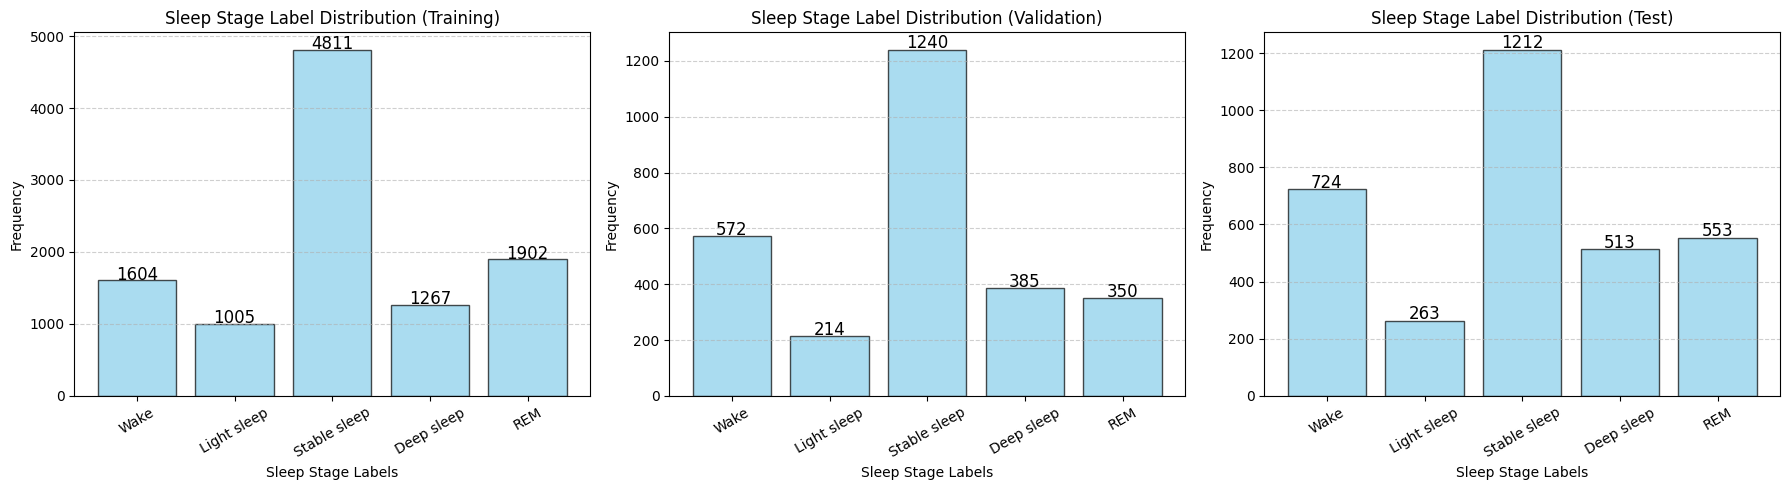

In [ ]:
from collections import Counter

# ------------------ Class distribution plots ------------------
# Create subplots
fig, axs = pyplot.subplots(1, 3, figsize=(18, 5))

# Loop over each dataset split
for ax, set_name, labels in zip(axs, ("Training", "Validation", "Test"), (T_train, T_valid, T_test)):

    # Count occurrences of each label
    # unique_labels, per_class_counts = torch.unique(labels, return_counts=True)

    # Convert tensor to list of Python ints (for Counter)
    label_counts = Counter(labels.tolist())

    # Extract unique labels and counts
    unique_labels = torch.tensor(list(label_counts.keys()))
    per_class_counts = torch.tensor(list(label_counts.values()))

    # Plot the distribution as a bar chart
    # ax.bar(unique_labels.tolist(), per_class_counts.tolist(), color='skyblue', edgecolor='black', alpha=0.7)
    ax.bar(unique_labels, per_class_counts, color='skyblue', edgecolor='black', alpha=0.7)

    # Annotate each bar with the exact count
    for i, count in enumerate(per_class_counts):
        ax.text(unique_labels[i], count + O, str(count.item()), ha='center', fontsize=12)

    # Set titles and axis labels
    ax.set_title(f"Sleep Stage Label Distribution ({set_name})")
    ax.set_xlabel("Sleep Stage Labels")
    ax.set_ylabel("Frequency")
    ax.set_xticks(range(O))
    ax.set_xticklabels(stage_names.values(), rotation=30)
    ax.grid(axis='y', linestyle="--", alpha=0.6)

pyplot.tight_layout()
pyplot.show()


#### Task 2.3: Class Weights
In later parts of the code, we will make use of class weighting strategies in order to automatically balance the loss function during training.
This requires to obtain class weights, which can be computed using the equation introduced in Lecture 7:

$$\lambda_\tau = \frac{N}{O\cdot N_\tau}$$

Here, $N$ defines the total number of samples in our dataset, while $N_\tau$ s the number of samples of class $\tau$, and $O$ is the number of classes.
We can also dynamically compute these weight per batch, to arrive at the **DynaMit** weighting.

Define a function to compute the class weights from a given set of targets $\vec t \in \{1,\ldots,O\}^{N}$, which can either be the **global** set of targets, or a batch of targets.

Note: When we provide a batch of targets, the number of samples for one class $N_\tau$ can be zero.
You need to decide how you handle this.

In [ ]:
def class_weights(targets):
    # Get the number of samples per class, and the classes for which samples exist
    number_of_samples = targets.shape[0]
    number_of_samples_per_class = torch.bincount(targets, minlength=O)
    # compute weight per class
    weights = number_of_samples / (O*number_of_samples_per_class)

    # Set weight to 0 for any class not present in a sample
    weights[number_of_samples_per_class == 0] = 0.0
    return weights

#### Test 2: Class Weights
Here, we test the functionality of the class weights.
Please try to pass this test before going on.

In [ ]:
# create a list of targets, which does not include label 2
targets_ = torch.tensor([0]*40 + [1]*20 + [3]*30 + [4]*10, dtype=torch.long)

# compute class weights
weights_ = class_weights(targets_)

# assert that the values are correct; we do not test label 2
assert abs(weights_[0] - 0.5) < 1e-6
assert abs(weights_[1] - 1.) < 1e-6
assert abs(weights_[3] - 2./3.) < 1e-6
assert abs(weights_[4] - 2.) < 1e-6

#### Task 2.4: Input Data Normalization

Since the data is in different input regimes, we want to normalize the data.

Implement a function that normalizes input data of all sets using the whitening method with given mean and standard deviation.
$$X_{norm} = \frac{X-\mu}{\sigma}$$
Compute the mean $\mu$ and the standard deviation $\sigma$ for your dataset.

Finally, normalize your input data using the implemented function.

**Note:** You can use `torch.mean()` and `torch.std()`, or apply the `sklearn.preprocessing.StandardScaler`.

In [ ]:
# Compute mean and std
mean = torch.mean(X_train)
std = torch.std(X_train)

# Normalize all sets
X_train_norm = (X_train - mean) / std
X_valid_norm = (X_valid - mean) / std
X_test_norm = (X_test - mean) / std

#### Task 2.5: Dataset and Data Loaders

We now have tensors that store data samples.
These need to be transformed into a `torch.utils.data.Dataset`, which can be used with a standard `torch.utils.data.DataLoader` to create batches of data.
For such simple data structures, `torch` provides such a dataset implementation in `torch.utils.data.TensorDataset`.

Create three `torch` datasets and their corresponding data loaders for each set by using `torch.utils.data.TensorDataset` and `torch.utils.data.DataLoader`.
The training batch size should be large enough, e.g. $B=256$, for the validation and test sets, you can choose any batch size of your choice.

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

# Define batch size
B = 256

# Dataset and Dataloader for training set
train_dataset = TensorDataset(X_train_norm, T_train)
train_dataloader = DataLoader(train_dataset, batch_size=B, shuffle=True)

# Dataset and Dataloader for validation set
valid_dataset = TensorDataset(X_valid_norm, T_valid)
valid_dataloader = DataLoader(valid_dataset, batch_size=128)

# Dataset and Dataloader for test set
test_dataset = TensorDataset(X_test_norm, T_test)
test_dataloader = DataLoader(test_dataset, batch_size=128)

### Network Implementation

In this part of the assignment, your goal is to build a deep learning model that can predict sleep stages from sequential EEG signals.

To handle the long input sequences efficiently (3000 time steps), you will first implement the 1D convolutional feature extractor that you have designed in Task 2.1.
This network compresses the raw EEG signal along the time dimension into several output channels $Q_3$, while preserving key temporal patterns.
It acts as a shared backbone for all subsequent model variants.

Once the features are extracted, you will explore four different network architectures, each modeling the temporal dependencies in a different way.

#### Task 2.6: 1D Convolutional Network (Feature Extractor)

In this task, you will implement the 1D convolutional feature extractor.
For simplicity, you can use `torch.nn.Sequential`.
This feature extractor will be used to **process raw EEG signals** and **compress the time dimension** by producing several output channels, which will later be passed to downstream modules such as RNN, LSTM, and Attention-based models, and the classifier.

Your feature extractor must follow these conditions:

1. It should consist of three `torch.nn.Conv1d` layers with a given number of $Q_3=128$ output channels.

2. You are encouraged to apply additional functions in these 3 layers such as:

    * Activation functions (e.g., ReLU, GELU) for non-linearity

    * `torch.nn.MaxPool1d` to reduce temporal resolution

    * `torch.nn.BatchNorm1d` for normalization

    * `torch.nn.Dropout` to improve generalization

In [ ]:
def feature_extractor(output_channels = 128):
    return torch.nn.Sequential(
        # Layer 1
        torch.nn.Conv1d(
            in_channels=1,
            out_channels=64,
            kernel_size=7,
            stride=2,
            padding=3
        ),
        torch.nn.BatchNorm1d(64),
        torch.nn.ReLU(),
        torch.nn.MaxPool1d(kernel_size=2),

        # Layer 2
        torch.nn.Conv1d(
            in_channels=64,
            out_channels=96,
            kernel_size=5,
            stride=2,
            padding=2
        ),
        torch.nn.BatchNorm1d(96),
        torch.nn.ReLU(),
        torch.nn.MaxPool1d(kernel_size=2),

        # Layer 3
        torch.nn.Conv1d(
            in_channels=96,
            out_channels=128,
            kernel_size=3,
            stride=2,
            padding=1
        ),
        torch.nn.BatchNorm1d(128),
        torch.nn.ReLU(),
        torch.nn.Dropout(p=0.3)
    )

#### Task 2.7: Design General Sleep Stage Classifier

In this task, you will implement **a general sleep stage classification network** using PyTorch's `torch.nn.Module`.
This network will support **four different architectural variants**, each built on top of **the same feature extractor** you implemented in **Task 2.6**.
All these four different architectural variants make use of **the same classifier**, which is, for example, composed of the following layers:

**Classifier:**
* Linear layer with 64 hidden units
* GELU activation function
* Dropout with the probability of 0.3
* Linear layer with $O$ output neurons

**Model Variants:**

Your task is to implement the following model variants in this general sleep stage classification network:
1. **Pooling**:
    *feature extractor ⟶ Global pooling ⟶ Classifier*

    The goal of this model variant is to evaluate how effective the convolution-based feature extractor alone is, without relying on any additional recurrent or attention mechanisms to capture sequence dependencies.
    After passing the input through **the feature extractor**, you will directly apply **global pooling** across **the time/sequence dimension** of the output feature map. This global pooling operation condenses each sequence into **a single fixed-size feature vector** for each sample, **summarizing** the learned temporal features into **a compact representation**.

    * In PyTorch, you can achieve this by taking the mean/max over the sequence dimension after the feature extractor.

    * Feed the summarized representation into the classifier.

2. **RNN**:
    *feature extractor ⟶ RNN layer ⟶ Final hidden state ⟶ Classifier*

    After **the feature extractor**, you will use **a Recurrent Neural Network (RNN) layer** to model **the temporal dependencies** over **the compressed time features** produced by the feature extractor network.

    * Use the PyTorch module `torch.nn.RNN` to implement this layer.

    * The RNN should consist of **a single layer** with **$128$** hidden units

    * Be careful about setting `batch_first` parameter when creating the RNN. **The shape of the input to the RNN must align with this parameter.**

    * After the RNN processes the sequence in `forward`, you must correctly determine the output that will be passed to the classifier. Remember that we want to **use the hidden state of the last sequence element**.

    * Feed the extracted output into the classifier.

    *Hint:* Keep in mind that `Conv1d` and `RNN` layers expect inputs in different dimension orders. Therefore, when connecting these layers, make sure to reshape (`permute`) the tensor appropriately.

3. **LSTM**:
    *feature extractor ⟶ LSTM layer ⟶ Final hidden state ⟶ Classifier*

    After **the feature extractor**, you will use **a Long Short-Term Memory layer** to model **the temporal dependencies** over **the compressed time features** produced by the feature extractor network.

    * Use the PyTorch module `torch.nn.LSTM` to implement this layer.

    * The LSTM should consist of **a single layer** with **$128$** hidden units

    * Be careful about setting `batch_first` parameter when creating the LSTM. **The shape of the input to the LSTM must align with this parameter.**

    * After the LSTM processes the sequence in `forward`, you must correctly determine the output that will be passed to the classifier. Remember that we want to **use the hidden state of the last sequence element**.

    * Feed the extracted output into the classifier.

    *Hint 1:* Be aware that the interfaces of `torch.nn.RNN` and `torch.nn.LSTM` differ in what the `forward` function outputs. Make sure that you adapt your handling of the output accordingly.
    
    *Hint 2:* Keep in mind that `Conv1d` and `LSTM` layers expect inputs in different dimension orders. Therefore, when connecting these layers, make sure to reshape (permute) the tensor appropriately.

4. **Attention + Class Token**:
    *feature extractor ⟶ Add Class Token ⟶ Self-Attention ⟶ Extract Class Token ⟶ Classifier*

    After passing the input through **the feature extractor**, the compressed sequence features will be further processed by **a self-attention mechanism**. To help the network better summarize the entire sequence information and their temporal relations into **a single representation**, you will introduce a `class token`.

    **What is a Class Token?**
    A `class token` is **a learnable vector** that is prepended (or appended) to the sequence of features before feeding into the attention module.
    During training, the model learns to use this token to gather global information from the entire sequence through the attention mechanism.
    This idea is inspired by techniques used in transformer architectures like ViT (Vision Transformer) and has proven effective for tasks that require summarizing a sequence into a fixed-size output.

    * Create a `class_token` parameter using `torch.nn.Parameter` and initialize it with a normal distribution $\mathcal{N}(0, 1)$ within **correct shape** inside `__init__` method.

    * Define `self_attention` layer using PyTorch’s `torch.nn.MultiheadAttention` module inside `__init__` method, with **one attention head** and an **embedding dimension of 128**. *This layer internally constructs the query $\mathbf W^{(Q)}$, key $\mathbf W^{(K)}$ and value matrices $\mathbf W^{(V)}$ used during attention computation.*

    * Be careful about setting `batch_first` parameter when defining the `self_attention`. **The shape of the input to the attention module must align with this parameter.**

    * In `forward`, add (concatenate) the class token to the beginning or end of the feature sequence after the feature extractor. Make sure that the same class token is replicated for all batch elements.

    * Apply `self_attention` over the extended sequence (including the class token).

    * After the attention operation, extract the transformed `class_token` (based on where you inserted it).

    * Feed the extracted class token into the classifier.

    *Hint 1:* You are expected to use the final class token after attention, which represents the entire input sequence.
    
    *Hint 2:* Keep in mind that `Conv1d` and `MultiheadAttention` layers expect inputs in different dimension orders. Therefore, when connecting these layers, make sure to reshape (permute) the tensor appropriately.

To keep the model implementation clean and organized, you are encouraged to use Python's **match-case statement** (available in Python 3.10 and above) to handle the different model behaviors in the `forward` function.
This avoids long `if ... elif ...` chains and makes the architecture selection more readable and efficient.


**Advice:**
This is surely the most difficult part of this assignment.
Maybe it would be advisable to implement and test this piece by piece, starting with the most simple network (Global Pooling), then implement the training code in Task 2.8, and run the training in Task 2.9.
Only after you have achieved reasonable results, attempt to implement the RNN and LSTM networks, and run their training in Task 2.9.
Finally, implement the attention-based part of the network, which requires more effort and debugging.
**Good luck!**

In [ ]:
class SleepStageClassifier(torch.nn.Module):

    def __init__(self, model_type, hidden_size = 128, O = O):
        super().__init__()

        # Define the extractor and model type
        self.feature_extractor = feature_extractor(output_channels=hidden_size)
        self.model_type = model_type

        # Define the classifier that will be used for all model variants
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(hidden_size, 64),
            torch.nn.GELU(),
            torch.nn.Dropout(p=0.3),
            torch.nn.Linear(64, O)
        )

        # Define optional layers based on model type
        match model_type:
            case "pool":
                # anything to be done here?
                pass

            case "rnn":
                # Define RNN layer
                self.rnn = torch.nn.RNN(
                    input_size=hidden_size,
                    hidden_size=hidden_size,
                    batch_first=True
                )

            case "lstm":
                # Define LSTM layer
                self.lstm = torch.nn.LSTM(
                    input_size=hidden_size,
                    hidden_size=hidden_size,
                    batch_first=True
                )

            case "attn":
                # Define Attention layer
                self.attn = torch.nn.MultiheadAttention(
                    embed_dim=hidden_size,
                    num_heads=1,
                    batch_first=True
                )

                # Create a learnable class token initialized from a normal distribution, ensuring it has the correct shape
                self.class_token = torch.nn.Parameter(
                    torch.randn(1, 1, hidden_size)
                )

    def forward(self, x):

        # Pass through feature extractor
        x = self.feature_extractor(x)

        # What should be done before the next layer?
        x = x.permute(0,2,1)

        match self.model_type:
            case "pool":
                # Global average pooling
                x = x.mean(dim=1)

            case "rnn":
                # Apply RNN layer
                out, h_n = self.rnn(x)
                # Extract correct feature
                x = h_n.squeeze(0)

            case "lstm":
                # Apply LSTM layer
                out, (h_n, c_n) = self.lstm(x)
                # Extract correct feature
                x = h_n.squeeze(0)

            case "attn":
                # Repeat the learnable class token for each batch
                B = x.size(0)
                cls_token = self.class_token.expand(B, -1, -1)

                # concatenate cls_token to input sequence
                x = torch.cat([cls_token, x], dim=1)

                # Apply attention
                x, _ = self.attn(x, x, x)

                # Extract updated class token
                x = x[:, 0, :]


        # Pass through classifier
        x = self.classifier(x)

        return x


### Network Training
In this section, you will implement a training loop function that handles the model optimization process.
Using this function, you will train all four model variants (Global Pooling, RNN, LSTM, Attention) on the prepared EEG dataset.

#### Task 2.8: Training Loop

In this section, you will implement a **training loop function** to optimize your sleep stage classification models.
The goal is to train all four model variants on the prepared dataset and compare their performance under different loss-weighting strategies.

You will begin by training each model using **the standard categorical cross-entropy loss** to establish a baseline and compare the performance of the four models to understand how well each architecture handles the task.
After that, you will apply two methods: **Class-Weighted Cross Entropy** and **DynaMit (Dynamic Bias Mitigation)** to help **mitigate the class imbalance problem** commonly found in sleep stage data.
Therefore, the function should support these three methods for use in the upcoming training tasks, based on the input parameter `weighting_strategy`, see below.
Specifically, you will experiment with the following three approaches:

1. **Standard Cross Entropy Loss**
    
    When `weighting_strategy = "none"`, standard cross-entropy loss should be used.

2. **Class-Weighted Cross Entropy**

    When `weighting_strategy = "global"`, global weights shall be computed. This can be achieved by calling the `class_weights` function defined in Task 2.3, using the appropriate targets from the dataset.

3. **DynaMit**

    When `weighting_strategy = "dynamit"`, per-batch weights shall be computed. This can be achieved by calling the `class_weights` function defined in Task 2.3, using the targets for the current batch.

*Hint:* You can use the functional variation of cross-entropy loss, which is defined as `torch.nn.functional.cross_entropy`, where you can pass the logits, the targets and the class weights.
Note that this requires the class weights to be on the same device as the logits and the targets.

**Here's a clean and concise description of what the training function should do:**

* Support three loss strategies

* Use the **SGD optimizer** with **$\eta=0.01$** and momentum of 0.9 for model parameter updates.

* Perform a training loop over the training dataset.

* Run a validation loop on the validation dataset after each epoch.

* Track and store the **average training loss** and **validation accuracy** after each epoch for monitoring convergence.

* Return the **training losses** and **validation accuracies**.

In [ ]:
def train(model,  weighting_strategy="none", epochs=30):

    if weighting_strategy not in ("none", "global", "dynamit"):
        raise ValueError("The given weighting strategy '{weighting_strategy}' is not known")

    # Send the model device
    model = model.to(device)

    # Define optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    # anything else to be initialized when weighting_strategy == "global"?
    if weighting_strategy == "global":
        global_weights = class_weights(T_train).to(device)

    # Store average training loss and validation accuracy
    train_losses, valid_accuracies = [], []

    for epoch in range(epochs):

        # Training
        total_loss = 0
        model.train()

        for x, t in train_dataloader:

            # determine class weights on the target batch when weighting_strategy == "dynamit"
            # hint: do this before putting the targets to the device
            if weighting_strategy == "dynamit":
                batch_weights = class_weights(t)
                weights = batch_weights.to(device)
            elif weighting_strategy == "global":
                weights = global_weights
            else:
                weights = None

            x = x.to(device)
            t = t.to(device)

            # forward the batch through the model
            logits = model(x)

            # compute loss
            # here, the simplest is to make use of torch.nn.functional.cross_entropy
            J = torch.nn.functional.cross_entropy(logits, t, weight=weights)

            # perform weight update step
            optimizer.zero_grad()
            J.backward()
            optimizer.step()

            # aggregate training loss
            total_loss += J.item()

        # Compute avgerage training loss
        avg_train_loss = total_loss / len(train_dataloader)

        # Track training loss
        train_losses.append(avg_train_loss)

        # compute validation accuracy
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for x_val, t_val in valid_dataloader:
                x_val = x_val.to(device)
                t_val = t_val.to(device)

                preds = model(x_val)
                predicted = torch.argmax(preds, dim=1)
                correct += (predicted == t_val).sum().item()
                total += t_val.size(0)

        valid_accuracy = correct / total

        # Track validation accuracy
        valid_accuracies.append(valid_accuracy)

        print(f"Epoch [{epoch+1}/{epochs}] -- Train Loss: {avg_train_loss:.4f} -- Val Acc: {valid_accuracy*100:.2f}%")

    return train_losses, valid_accuracies

#### Task 2.9: Plot Training Loss and Validation Accuracy
In this task, you will implement a function that plots the training loss and validation accuracy over epochs to visually assess the model's learning progress.
These plots help determine whether the model is converging, overfitting, or underfitting during training.

Smoothly decreasing training loss and increasing validation accuracy typically indicate good convergence.

In [ ]:
def plot(train_losses, valid_accuracies):
    # --- Plot Training Loss & Validation Accuracy ---

    fig, ax = pyplot.subplots(figsize=(8, 5))

    # Training loss (Left Y-axis)
    ax.plot(range(1, len(train_losses) + 1), train_losses, label="Training Loss", color='b', marker='o')
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss", color='b')
    ax.tick_params(axis='y', labelcolor='b')

    # Validation Accuracy (Right Y-axis)
    ax2 = ax.twinx()
    ax2.plot(range(1, len(valid_accuracies) + 1), [acc * 100 for acc in valid_accuracies], label="Validation Accuracy", color='g', linestyle="dashed")
    ax2.set_ylabel("Accuracy (%)", color='g')
    ax2.tick_params(axis='y', labelcolor='g')

    # Titles and Legends
    pyplot.title("Training Loss vs Validation Accuracy")
    ax.legend(loc="upper left")
    ax2.legend(loc="lower left")

    pyplot.grid(True, linestyle="--", alpha=0.6)
    pyplot.show()

#### Task 2.10: Train Four Model Variants with Standard Categorical Cross Entropy

In this task, you will train **all four model variants** using **the standard categorical cross-entropy loss** to compare different model topologies for sleep stage classification.
Each model uses the same feature extractor topology and classifier head, but differs in **how it models temporal dependencies** (e.g., RNN, LSTM, Attention).

Your goal is to evaluate **how well each architecture performs without any special handling for class imbalance**.

*Follow these steps for each model variant:*

* Initialize the model variant with the appropriate `model_type` (using previously implemented network class)

* Run the training loop (using previously implemented training function) for **30 epochs** or more.

* Plot the training results to monitor learning progress and performance.

Once trained, you will be able to compare the performance of all four model variants under the same training conditions.

**<font color='red' size='3'>WARNING: The RNN model might not perform well. Maybe work on the Global Pooling model first, and then directly transition to the LSTM. Keep the RNN for later.</font>**

Epoch [1/30] -- Train Loss: 1.3717 -- Val Acc: 56.07%
Epoch [2/30] -- Train Loss: 0.9603 -- Val Acc: 69.18%
Epoch [3/30] -- Train Loss: 0.6930 -- Val Acc: 72.37%
Epoch [4/30] -- Train Loss: 0.6117 -- Val Acc: 68.92%
Epoch [5/30] -- Train Loss: 0.5873 -- Val Acc: 74.07%
Epoch [6/30] -- Train Loss: 0.5630 -- Val Acc: 74.28%
Epoch [7/30] -- Train Loss: 0.5326 -- Val Acc: 80.73%
Epoch [8/30] -- Train Loss: 0.5254 -- Val Acc: 71.53%
Epoch [9/30] -- Train Loss: 0.4981 -- Val Acc: 77.25%
Epoch [10/30] -- Train Loss: 0.4912 -- Val Acc: 82.94%
Epoch [11/30] -- Train Loss: 0.4754 -- Val Acc: 74.65%
Epoch [12/30] -- Train Loss: 0.4760 -- Val Acc: 78.96%
Epoch [13/30] -- Train Loss: 0.4752 -- Val Acc: 81.75%
Epoch [14/30] -- Train Loss: 0.4555 -- Val Acc: 84.39%
Epoch [15/30] -- Train Loss: 0.4409 -- Val Acc: 80.44%
Epoch [16/30] -- Train Loss: 0.4473 -- Val Acc: 76.02%
Epoch [17/30] -- Train Loss: 0.4397 -- Val Acc: 83.45%
Epoch [18/30] -- Train Loss: 0.4237 -- Val Acc: 80.33%
Epoch [19/30] -- Tr

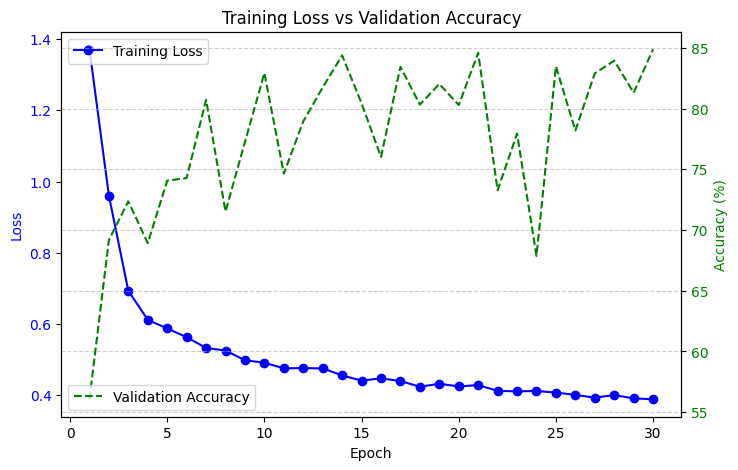

In [ ]:
# ----- Pooled model Training -----

# Initialize the model
pooled_model = SleepStageClassifier(model_type="pool")

# Run the training
pooled_train_losses, pooled_valid_accuracies = train(pooled_model, weighting_strategy="none", epochs=30)

# Plot training results
plot(pooled_train_losses, pooled_valid_accuracies)

Epoch [1/30] -- Train Loss: 1.4445 -- Val Acc: 46.83%
Epoch [2/30] -- Train Loss: 1.2736 -- Val Acc: 48.57%
Epoch [3/30] -- Train Loss: 1.1116 -- Val Acc: 55.81%
Epoch [4/30] -- Train Loss: 0.9806 -- Val Acc: 54.18%
Epoch [5/30] -- Train Loss: 1.2265 -- Val Acc: 49.44%
Epoch [6/30] -- Train Loss: 1.0355 -- Val Acc: 54.15%
Epoch [7/30] -- Train Loss: 0.9709 -- Val Acc: 54.40%
Epoch [8/30] -- Train Loss: 1.1085 -- Val Acc: 54.18%
Epoch [9/30] -- Train Loss: 1.0152 -- Val Acc: 59.98%
Epoch [10/30] -- Train Loss: 1.3824 -- Val Acc: 46.58%
Epoch [11/30] -- Train Loss: 1.2383 -- Val Acc: 47.56%
Epoch [12/30] -- Train Loss: 1.2322 -- Val Acc: 45.67%
Epoch [13/30] -- Train Loss: 1.2140 -- Val Acc: 51.07%
Epoch [14/30] -- Train Loss: 1.5428 -- Val Acc: 46.14%
Epoch [15/30] -- Train Loss: 1.3764 -- Val Acc: 48.57%
Epoch [16/30] -- Train Loss: 1.3610 -- Val Acc: 47.23%
Epoch [17/30] -- Train Loss: 1.3497 -- Val Acc: 47.34%
Epoch [18/30] -- Train Loss: 1.3339 -- Val Acc: 48.86%
Epoch [19/30] -- Tr

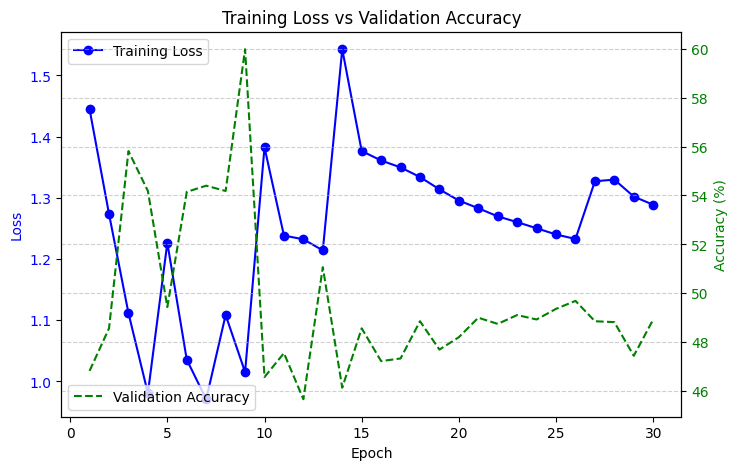

In [ ]:
# ----- RNN Training -----

# Initialize the model
rnn_model = SleepStageClassifier(model_type="rnn")

# Run the training
rnn_train_losses, rnn_valid_accuracies = train(rnn_model, weighting_strategy="none", epochs=30)

# Plot training results
plot(rnn_train_losses, rnn_valid_accuracies)

Epoch [1/30] -- Train Loss: 1.4980 -- Val Acc: 44.91%
Epoch [2/30] -- Train Loss: 1.3944 -- Val Acc: 44.91%
Epoch [3/30] -- Train Loss: 1.3270 -- Val Acc: 48.32%
Epoch [4/30] -- Train Loss: 1.2519 -- Val Acc: 48.79%
Epoch [5/30] -- Train Loss: 1.1539 -- Val Acc: 56.43%
Epoch [6/30] -- Train Loss: 0.9648 -- Val Acc: 64.03%
Epoch [7/30] -- Train Loss: 0.7812 -- Val Acc: 69.47%
Epoch [8/30] -- Train Loss: 1.2846 -- Val Acc: 54.84%
Epoch [9/30] -- Train Loss: 1.1517 -- Val Acc: 54.91%
Epoch [10/30] -- Train Loss: 1.0893 -- Val Acc: 59.15%
Epoch [11/30] -- Train Loss: 0.9707 -- Val Acc: 62.12%
Epoch [12/30] -- Train Loss: 0.7815 -- Val Acc: 69.32%
Epoch [13/30] -- Train Loss: 0.7894 -- Val Acc: 52.66%
Epoch [14/30] -- Train Loss: 1.0371 -- Val Acc: 65.66%
Epoch [15/30] -- Train Loss: 0.7617 -- Val Acc: 64.40%
Epoch [16/30] -- Train Loss: 0.6993 -- Val Acc: 40.06%
Epoch [17/30] -- Train Loss: 0.7675 -- Val Acc: 69.87%
Epoch [18/30] -- Train Loss: 0.6623 -- Val Acc: 71.28%
Epoch [19/30] -- Tr

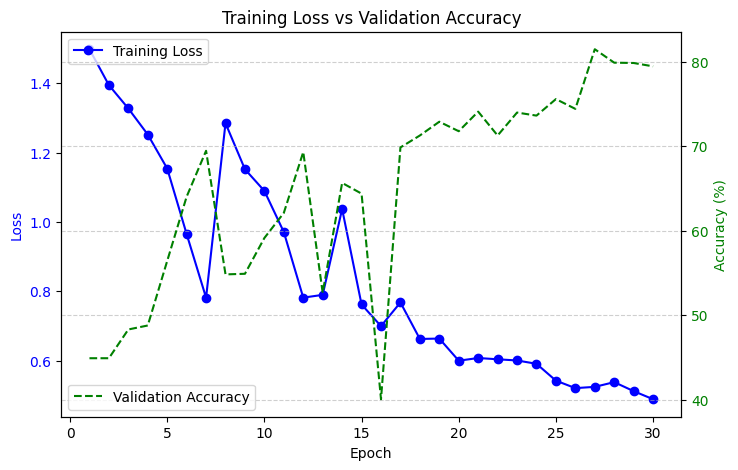

In [ ]:
# ----- LSTM Training -----

# Initialize the model
lstm_model = SleepStageClassifier(model_type="lstm")

# Run the training
lstm_train_losses, lstm_valid_accuracies = train(lstm_model, weighting_strategy="none", epochs=30)

# Plot training results
plot(lstm_train_losses, lstm_valid_accuracies)

Epoch [1/30] -- Train Loss: 1.4096 -- Val Acc: 52.99%
Epoch [2/30] -- Train Loss: 1.0525 -- Val Acc: 62.66%
Epoch [3/30] -- Train Loss: 0.7701 -- Val Acc: 73.56%
Epoch [4/30] -- Train Loss: 0.6042 -- Val Acc: 74.28%
Epoch [5/30] -- Train Loss: 0.5470 -- Val Acc: 79.54%
Epoch [6/30] -- Train Loss: 0.5208 -- Val Acc: 81.78%
Epoch [7/30] -- Train Loss: 0.5071 -- Val Acc: 78.59%
Epoch [8/30] -- Train Loss: 0.4706 -- Val Acc: 84.61%
Epoch [9/30] -- Train Loss: 0.4639 -- Val Acc: 84.14%
Epoch [10/30] -- Train Loss: 0.4527 -- Val Acc: 83.34%
Epoch [11/30] -- Train Loss: 0.4511 -- Val Acc: 83.48%
Epoch [12/30] -- Train Loss: 0.4310 -- Val Acc: 83.92%
Epoch [13/30] -- Train Loss: 0.4216 -- Val Acc: 83.16%
Epoch [14/30] -- Train Loss: 0.4140 -- Val Acc: 83.38%
Epoch [15/30] -- Train Loss: 0.4140 -- Val Acc: 79.32%
Epoch [16/30] -- Train Loss: 0.4096 -- Val Acc: 84.86%
Epoch [17/30] -- Train Loss: 0.4037 -- Val Acc: 84.43%
Epoch [18/30] -- Train Loss: 0.4079 -- Val Acc: 81.46%
Epoch [19/30] -- Tr

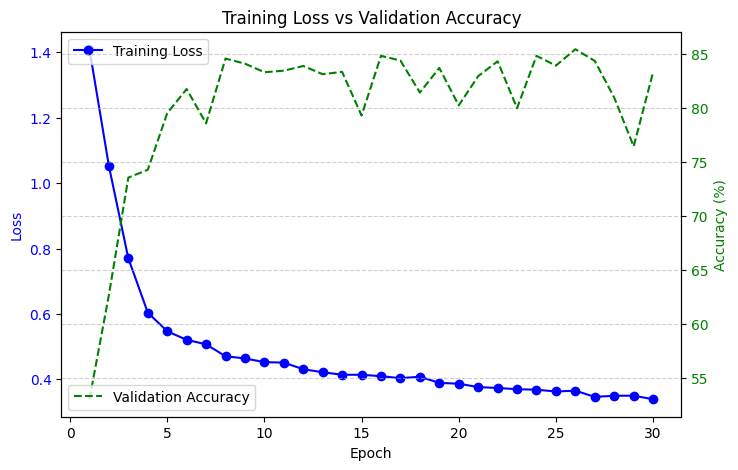

In [ ]:
# ----- Attention Training -----

# Initialize the model
attn_model = SleepStageClassifier(model_type="attn")

# Run the training
attn_train_losses, attn_valid_accuracies = train(attn_model, weighting_strategy="none", epochs=30)

# Plot training results
plot(attn_train_losses, attn_valid_accuracies)

### Evaluation and Bias Mitigation

In this section, you will evaluate the performance of all four trained model variants on the test set using three key metrics:

* **Accuracy**: the proportion of correctly predicted samples across the entire test set.

* **Balanced Accuracy**: the average of recall scores across all classes, helping to account for class imbalance.

* **Per-Class Accuracy**: individual accuracy for each sleep stage, providing insights into which stages are predicted well and which are not.

Based on these metrics, you will select the best-performing model — the one that achieves the most reliable results.

Once the best model is identified, you will retrain it using two different strategies to mitigate the class imbalance issue:

1. **Class-Weighted Cross Entropy**

    Incorporates static global class weights into the loss function based on training set distribution.

2. **DynaMit**

    Applies dynamic per-batch class weights during training, adapting to local imbalances.

This comparison allows you to assess the effectiveness of bias mitigation strategies in improving fairness and performance, especially on underrepresented sleep stages.

#### Task 2.11: Evaluation Function

In this task, you will write a function to evaluate a **trained model** on the **test set**.

The goal is to assess the model's performance using the following metrics: **Overall Accuracy**, **Balanced Accuracy**  and **Per-Class Accuracy**.

**Per-Class Accuracy**  

   $$\forall \tau\in\{1,\ldots,O\}: \text{Per-Class Accuracy}_\tau = \frac{TP_\tau}{N_\tau}$$

**Balanced Accuracy**:

   $$\text{Balanced Accuracy} = \frac{1}{O} \sum_{\tau=1}^{O} \text{Per-Class Accuracy}_\tau$$

Your evaluation function should:

- Run the test loop

- Use `sklearn.metrics` to compute:

  - `accuracy_score` (for overall accuracy)
  - `balanced_accuracy_score` (for balanced accuracy)
  - compute the diagonal of the normalized `confusion_matrix` (for per-class accuracy); this is a vector with $O$ elements

- Return all metrics

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix

def evaluate(model, test_dataloader, device, num_classes=5):

    # Define empty lists to store predictions and their corresponding targets
    all_preds, all_targets = [], []

    # Test loop
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # No gradients needed for evaluation
        for x, t in test_dataloader:
            # Move data to the correct device
            x = x.to(device)
            t = t.to(device)

            # Forward pass
            logits = model(x)

            # Get predicted class (highest logit)
            pred = torch.argmax(logits, dim=1)

            # Store predictions and targets
            all_preds.extend(pred.cpu().numpy())
            all_targets.extend(t.cpu().numpy())

    # Convert lists to numpy arrays for sklearn metrics
    all_preds = numpy.array(all_preds)
    all_targets = numpy.array(all_targets)

    # Compute evaluation metrics via sklearn
    overall_acc = accuracy_score(all_targets, all_preds)
    balanced_acc = balanced_accuracy_score(all_targets, all_preds)

    # Compute per class accuracy via confusion matrix
    # Normalize confusion matrix by row (true label) to get per-class accuracy
    conf_matrix = confusion_matrix(all_targets, all_preds, labels=range(num_classes))
    per_class_acc = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

    return overall_acc, balanced_acc, per_class_acc

#### Task 2.12: Define a Plot Function for Evaluation

In this task, you will define a function that visualizes the evaluation results of all four model variants to better compare their performance.

In [ ]:
def plot_evaluation(all_model_results):

    num_models = len(all_model_results)
    rows = (num_models + 1) // 2
    fig, axs = pyplot.subplots(rows, 2, figsize=(14, 5 * rows))
    axs = axs.flatten()

    for i, (model_name, (overall_acc, balanced_acc, per_class_acc)) in enumerate(all_model_results.items()):
        ax = axs[i]

        # Plot each per-class accuracy with bar plot
        bars = ax.bar(stage_names.values(), per_class_acc, color=[stage_colors[i] for i in range(5)])

        # Annotate the value of per-class-acc to the top of the bars
        for bar, acc in zip(bars, per_class_acc):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f"{acc:.2f}", ha='center', fontsize=10)

        ax.set_ylim(0, 1.05)
        ax.set_ylabel("Accuracy")
        ax.set_title(model_name, fontsize=12, pad=30)
        ax.grid(axis='y', linestyle='--', alpha=0.5)

        # Accuracy box just below title
        acc_text = f"Overall Acc: {overall_acc * 100:.2f}%   Balanced Acc: {balanced_acc * 100:.2f}%"
        ax.text(
            0.5, 1.07, acc_text, transform=ax.transAxes,
            ha="center", va="top",
            bbox=dict(facecolor='lightgreen', edgecolor='gray', boxstyle='round,pad=0.3'),
            fontsize=10
        )

    # Remove any unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    pyplot.tight_layout()
    pyplot.show()

#### Task 2.13: Plot All Evaluation Metrics for All Models

In this task, you will run the evaluation on test set for each model and visualize the evaluation results of all four model variants to better compare their performance.

These plots will help you compare the strengths and weaknesses of each architecture and identify which model performs best across both highly and sparsely represented sleep stages.

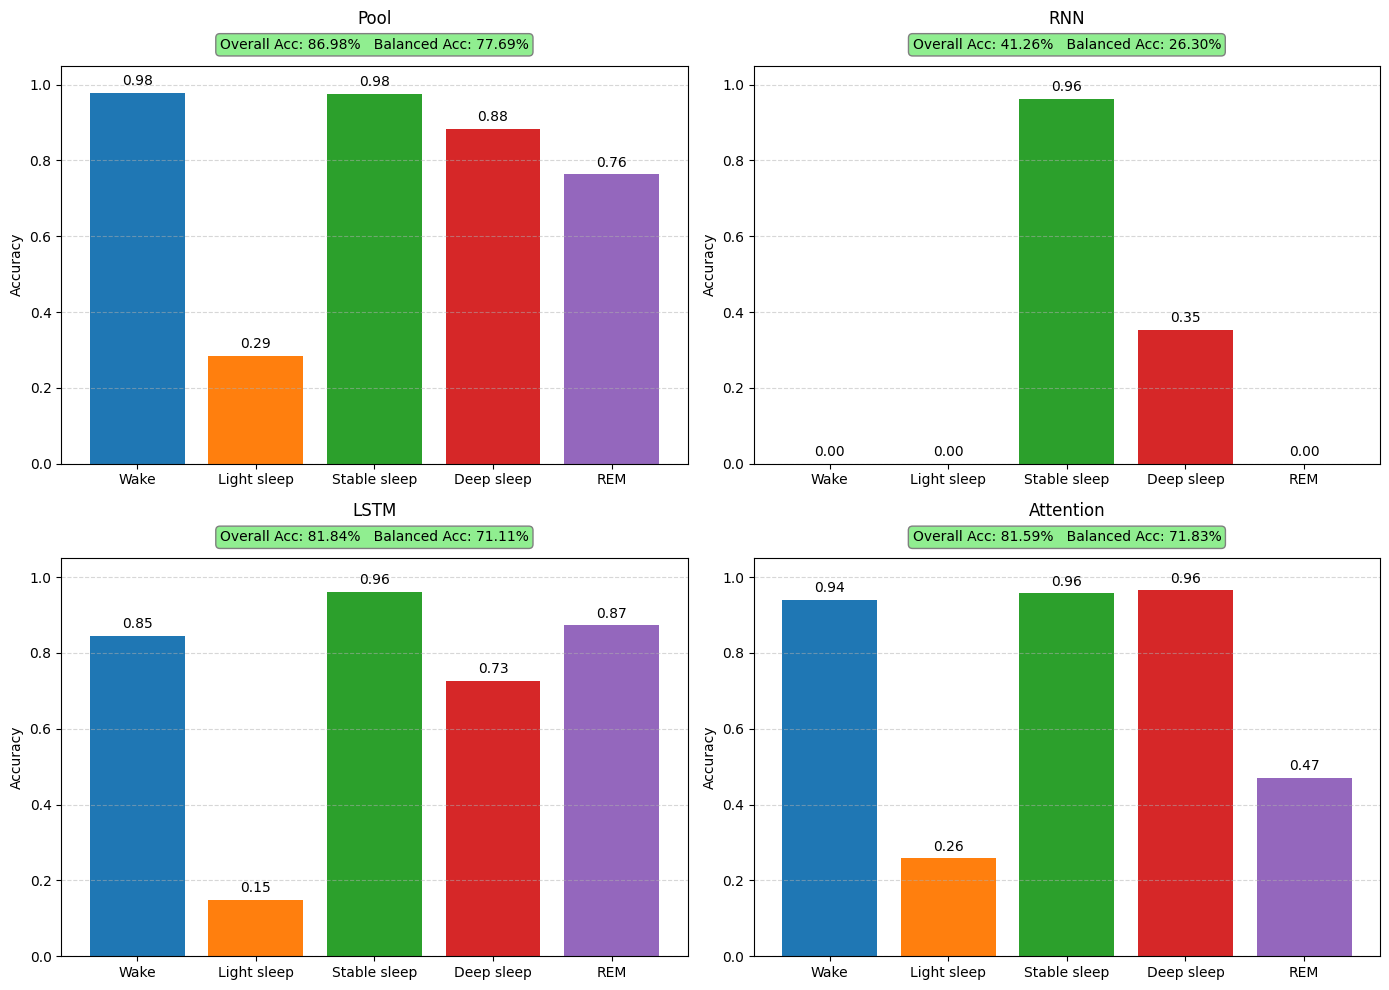

In [ ]:
# run evaluation for all models
all_model_results = {
    "Pool": evaluate(pooled_model.to(device), test_dataloader, device),
    "RNN": evaluate(rnn_model.to(device), test_dataloader, device),
    "LSTM": evaluate(lstm_model.to(device), test_dataloader, device),
    "Attention": evaluate(attn_model.to(device), test_dataloader, device)
}

# Compare results
plot_evaluation(all_model_results)

#### Task 2.14: Bias Mitigation

In this task, you will address the issue of **class imbalance** by retraining the best-performing model as determined in the previous task using two different bias mitigation strategies.

**Class imbalance** is a common challenge in sleep stage classification, where some stages (like Light Sleep) may be underrepresented.
This task focuses on evaluating whether loss function modifications can improve fairness and accuracy across all classes.

Steps to Follow:

* Select the best model variant based on highest balanced accuracy

* Initialize the same model architecture twice

* Train each one of these models using:

    1. **global** weighting strategy

    2. batch-local **DynaMit** sampling
    
* Evaluate the retrained models on the test set

* Plot and compare the metrics from all three runs (Standard Cross Entropy, Weighted CCE, DynaMit) of the same model.

Analyze how each mitigation strategy affects performance across different sleep stages.

Best model based on balanced accuracy: Pool with 0.7769
Epoch [1/30] -- Train Loss: 1.4377 -- Val Acc: 33.57%
Epoch [2/30] -- Train Loss: 1.0633 -- Val Acc: 64.80%
Epoch [3/30] -- Train Loss: 0.8294 -- Val Acc: 71.10%
Epoch [4/30] -- Train Loss: 0.7435 -- Val Acc: 71.93%
Epoch [5/30] -- Train Loss: 0.6744 -- Val Acc: 77.62%
Epoch [6/30] -- Train Loss: 0.6415 -- Val Acc: 78.67%
Epoch [7/30] -- Train Loss: 0.6260 -- Val Acc: 79.57%
Epoch [8/30] -- Train Loss: 0.6115 -- Val Acc: 78.63%
Epoch [9/30] -- Train Loss: 0.6019 -- Val Acc: 79.57%
Epoch [10/30] -- Train Loss: 0.5758 -- Val Acc: 81.93%
Epoch [11/30] -- Train Loss: 0.5650 -- Val Acc: 83.30%
Epoch [12/30] -- Train Loss: 0.5473 -- Val Acc: 83.12%
Epoch [13/30] -- Train Loss: 0.5442 -- Val Acc: 84.53%
Epoch [14/30] -- Train Loss: 0.5210 -- Val Acc: 81.31%
Epoch [15/30] -- Train Loss: 0.5207 -- Val Acc: 72.87%
Epoch [16/30] -- Train Loss: 0.5185 -- Val Acc: 80.04%
Epoch [17/30] -- Train Loss: 0.5033 -- Val Acc: 82.76%
Epoch [18/30] -- T

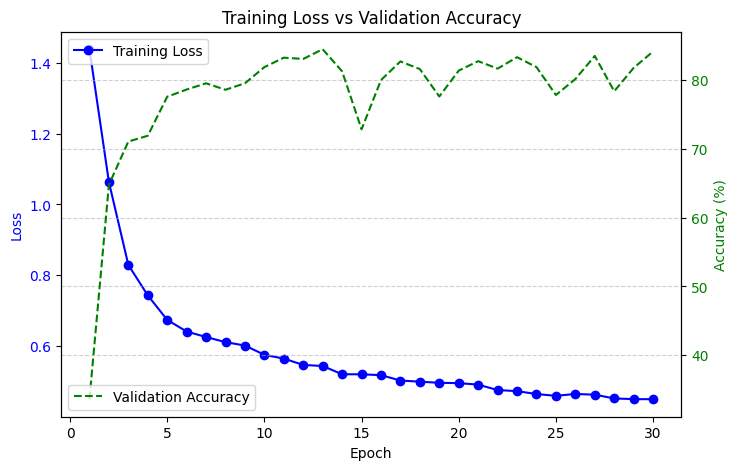

Epoch [1/30] -- Train Loss: 1.3890 -- Val Acc: 44.84%
Epoch [2/30] -- Train Loss: 1.0990 -- Val Acc: 56.25%
Epoch [3/30] -- Train Loss: 0.8524 -- Val Acc: 70.16%
Epoch [4/30] -- Train Loss: 0.7242 -- Val Acc: 75.48%
Epoch [5/30] -- Train Loss: 0.6874 -- Val Acc: 77.47%
Epoch [6/30] -- Train Loss: 0.6581 -- Val Acc: 67.19%
Epoch [7/30] -- Train Loss: 0.6183 -- Val Acc: 79.28%
Epoch [8/30] -- Train Loss: 0.5861 -- Val Acc: 80.59%
Epoch [9/30] -- Train Loss: 0.5835 -- Val Acc: 80.19%
Epoch [10/30] -- Train Loss: 0.5748 -- Val Acc: 74.76%
Epoch [11/30] -- Train Loss: 0.5482 -- Val Acc: 81.75%
Epoch [12/30] -- Train Loss: 0.5480 -- Val Acc: 84.75%
Epoch [13/30] -- Train Loss: 0.5282 -- Val Acc: 77.98%
Epoch [14/30] -- Train Loss: 0.5237 -- Val Acc: 80.80%
Epoch [15/30] -- Train Loss: 0.5170 -- Val Acc: 67.44%
Epoch [16/30] -- Train Loss: 0.5165 -- Val Acc: 81.49%
Epoch [17/30] -- Train Loss: 0.5016 -- Val Acc: 81.56%
Epoch [18/30] -- Train Loss: 0.5007 -- Val Acc: 82.94%
Epoch [19/30] -- Tr

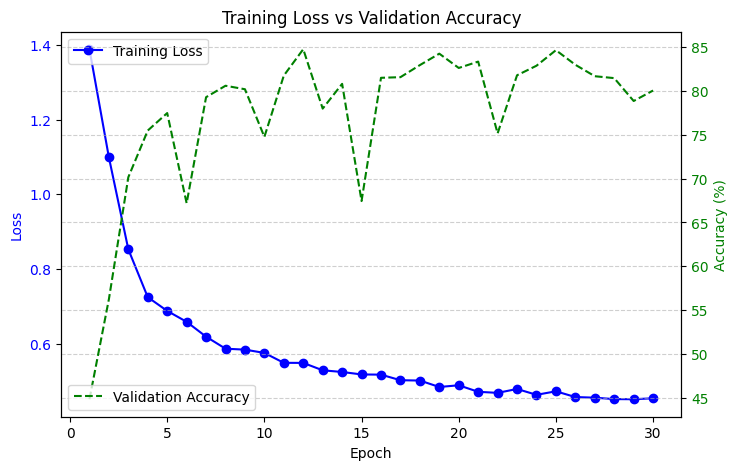

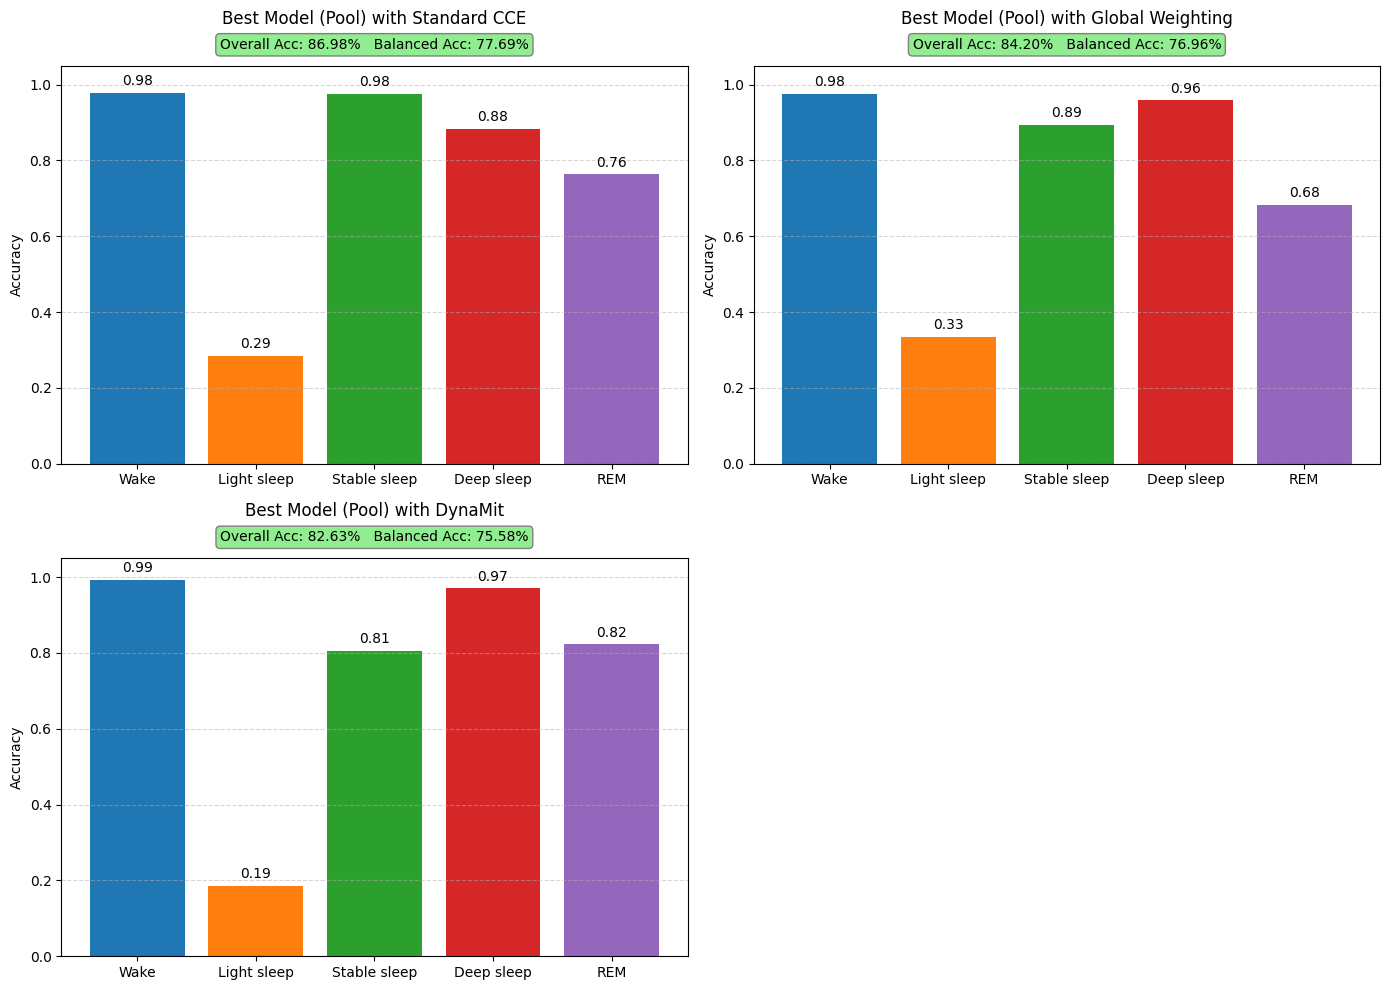

In [ ]:
# Determine best model based on balanced accuracy
balanced_accuracies = {model_name: results[1] for model_name, results in all_model_results.items()}
best_model_name = max(balanced_accuracies, key=balanced_accuracies.get)
print(f"Best model based on balanced accuracy: {best_model_name} with {balanced_accuracies[best_model_name]:.4f}")

# Determine which model architecture to use based on the best model name
if best_model_name == "Pool":
    best_model_type = "pool"
elif best_model_name == "RNN":
    best_model_type = "rnn"
elif best_model_name == "LSTM":
    best_model_type = "lstm"
else:  # Attention
    best_model_type = "attn"

# Save the evaluation results of the best model with standard CCE
best_model_standard_results = all_model_results[best_model_name]

# ---- Training with Class Weighted CCE ----

# Initialize the best model topology
best_model_global_weighted = SleepStageClassifier(model_type=best_model_type)

# Train the best_model with these fixed global class weights
global_weighted_train_losses, global_weighted_valid_accuracies = train(
    best_model_global_weighted,
    weighting_strategy="global",
    epochs=30
)

# Plot training results for global weighting
print(f"\nTraining plot for {best_model_name} with Global Class Weighting:")
plot(global_weighted_train_losses, global_weighted_valid_accuracies)

# ---- Training with DynaMit ----

# Initialize the best model topology again
best_model_dynamit = SleepStageClassifier(model_type=best_model_type)

# Train the best_model with dynamic weights
dynamit_train_losses, dynamit_valid_accuracies = train(
    best_model_dynamit,
    weighting_strategy="dynamit",
    epochs=30
)

# Plot training results for DynaMit
print(f"\nTraining plot for {best_model_name} with DynaMit Weighting:")
plot(dynamit_train_losses, dynamit_valid_accuracies)

# Run evaluation for all three models
best_model_results = {
    f"Best Model ({best_model_name}) with Standard CCE": best_model_standard_results,
    f"Best Model ({best_model_name}) with Global Weighting": evaluate(best_model_global_weighted.to(device), test_dataloader, device),
    f"Best Model ({best_model_name}) with DynaMit": evaluate(best_model_dynamit.to(device), test_dataloader, device)
}

# Compare results
plot_evaluation(best_model_results)